In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install Ninja
! git clone https://github.com/NVlabs/stylegan3.git

import os
os.chdir("/content/stylegan3")

import click
import dnnlib
import h5py
import torch
import numpy as np
import PIL.Image
from gen_images import make_transform
from scipy import sparse, stats
from scipy.stats import t, zscore
from scipy.ndimage import interpolation
from sklearn.linear_model import LinearRegression
import legacy
import matplotlib.pyplot as plt



device = torch.device('cuda')
network_pkl = "/content/drive/My Drive/PhD/GANs/StyleGAN3/stylegan3-r-ffhq-1024x1024.pkl"
with dnnlib.util.open_url(network_pkl) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore
label = torch.zeros([1, G.c_dim], device=device)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'stylegan3' already exists and is not an empty directory.


In [ ]:
# Randomly sample latents
z_te = np.random.RandomState(7).randn(100, G.z_dim)
z_tr = np.random.RandomState(6).randn(4000, G.z_dim)
np.save("/content/drive/My Drive/faces/z_te.npy", z_te)
np.save("/content/drive/My Drive/faces/z_tr.npy", z_tr)

In [ ]:
# Test set
for i in range(z_te.shape[0]):
    img = G(torch.from_numpy(z_te[None, i]).to(device), label, truncation_psi=0.7, noise_mode="none")
    img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    image = PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')
    image.save("/content/drive/My Drive/faces/test/%s.png" % str(i+1).zfill(4))

# Training set
for i in range(z_tr.shape[0]):
    img = G(torch.from_numpy(z_tr[None, i]).to(device), label, truncation_psi=0.7, noise_mode="none")
    img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    image = PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')
    image.save("/content/drive/My Drive/faces/training/%s.png" % str(i+1).zfill(4))

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


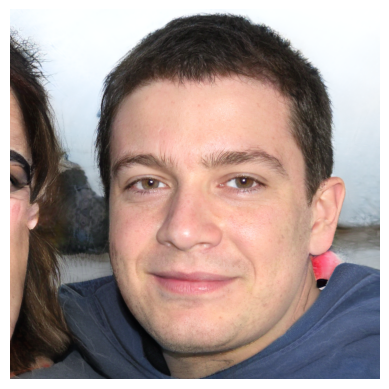

In [ ]:
# Example from test set
img = G(torch.from_numpy(z_te[None, 0]).to(device), label, truncation_psi=0.7, noise_mode="none")
img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
image = PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')
plt.figure()
plt.imshow(image)
plt.axis("off")
plt.show()